In [602]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import random
import joblib

import scipy.stats as stats
from scipy.stats import chi2_contingency

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

from collections import Counter



In [603]:
# Load dataset
df1 = pd.read_csv('RSU50-20249401-DataSet.csv')

# Display the first few rows of the dataset
df1.head()

,POLICYNO,PRODUCT_TYPE,POLICYTERM_YEARS,COMMENCEDATE,COMMENCED_YEAR,PAYMENT_FREQUENCY,ANNUAL_PREMIUM,PAYMENT_METHOD,LASTPAYMENTDATE,NEXTPAYMENTDATE,...,OTHER COVERS_SUMINSURED,AGE,GENDER,MARITAL_STATUS,NO_OF_SETTLED_CLAIMS,PAIDCLAIM_AMOUNT,LAST_CLAIM_PROCESSTIME_DAYS,PROVINCECODE,TOTAL_PAYMENT,POLICY_STATUS
0,NJEV2018-453,ENDOW,49,2/25/2018,2018,M,24732,CASH,4/25/2018,5/25/2018 0:00,...,0,32,M,M,0,0,0,NRWTN,6183,LAPSE
1,NJEV2018-2541,ENDOW,49,10/19/2018,2018,M,24732,CASH,10/19/2018,11/19/2018 0:00,...,0,32,M,M,0,0,0,NRCTL,2061,LAPSE
2,NJEV2018-1209,ENDOW,49,5/25/2018,2018,M,24732,CASH,5/25/2018,6/25/2018 0:00,...,0,32,M,M,0,0,0,UVA,2061,LAPSE
3,NJEV2018-1378,ENDOW,49,6/11/2018,2018,M,24732,CASH,2/11/2020,3/11/2020 0:00,...,0,32,F,M,0,0,0,NRWTN,43281,LAPSE
4,NJEV2018-1853,ENDOW,49,8/8/2018,2018,M,24732,CASH,8/8/2018,9/8/2018 0:00,...,0,32,M,M,0,0,0,NRWTN,2061,LAPSE


In [604]:
#Shape of the dataframe

print("The shape of the dataframe is: {}".format(df1.shape))

The shape of the dataframe is: (61053, 27)


In [605]:
#Columns of the dataframe

df1.columns

Index(['POLICYNO', 'PRODUCT_TYPE', 'POLICYTERM_YEARS', 'COMMENCEDATE',
       'COMMENCED_YEAR', 'PAYMENT_FREQUENCY', 'ANNUAL_PREMIUM',
       'PAYMENT_METHOD', 'LASTPAYMENTDATE', 'NEXTPAYMENTDATE',
       'NEXTPAYMENT_YEAR', 'TENURE_MONTHS', 'NO_OF_COVERS', 'TOTAL_SUMINSURED',
       'BASIC_SUMINSURED', 'ACCIDENT_SUMINSURED', 'HOSPITALIZATION_SUMINSURED',
       'OTHER COVERS_SUMINSURED', 'AGE', 'GENDER', 'MARITAL_STATUS',
       'NO_OF_SETTLED_CLAIMS', 'PAIDCLAIM_AMOUNT',
       'LAST_CLAIM_PROCESSTIME_DAYS', 'PROVINCECODE', 'TOTAL_PAYMENT',
       'POLICY_STATUS'],
      dtype='object')

In [606]:
# Basic dataset information

print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61053 entries, 0 to 61052
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   POLICYNO                     61053 non-null  object
 1   PRODUCT_TYPE                 61053 non-null  object
 2   POLICYTERM_YEARS             61053 non-null  int64 
 3   COMMENCEDATE                 61053 non-null  object
 4   COMMENCED_YEAR               61053 non-null  int64 
 5   PAYMENT_FREQUENCY            61053 non-null  object
 6   ANNUAL_PREMIUM               61053 non-null  int64 
 7   PAYMENT_METHOD               61053 non-null  object
 8   LASTPAYMENTDATE              61053 non-null  object
 9   NEXTPAYMENTDATE              61053 non-null  object
 10  NEXTPAYMENT_YEAR             61053 non-null  int64 
 11  TENURE_MONTHS                61053 non-null  int64 
 12  NO_OF_COVERS                 61053 non-null  int64 
 13  TOTAL_SUMINSURED             61

<Axes: >

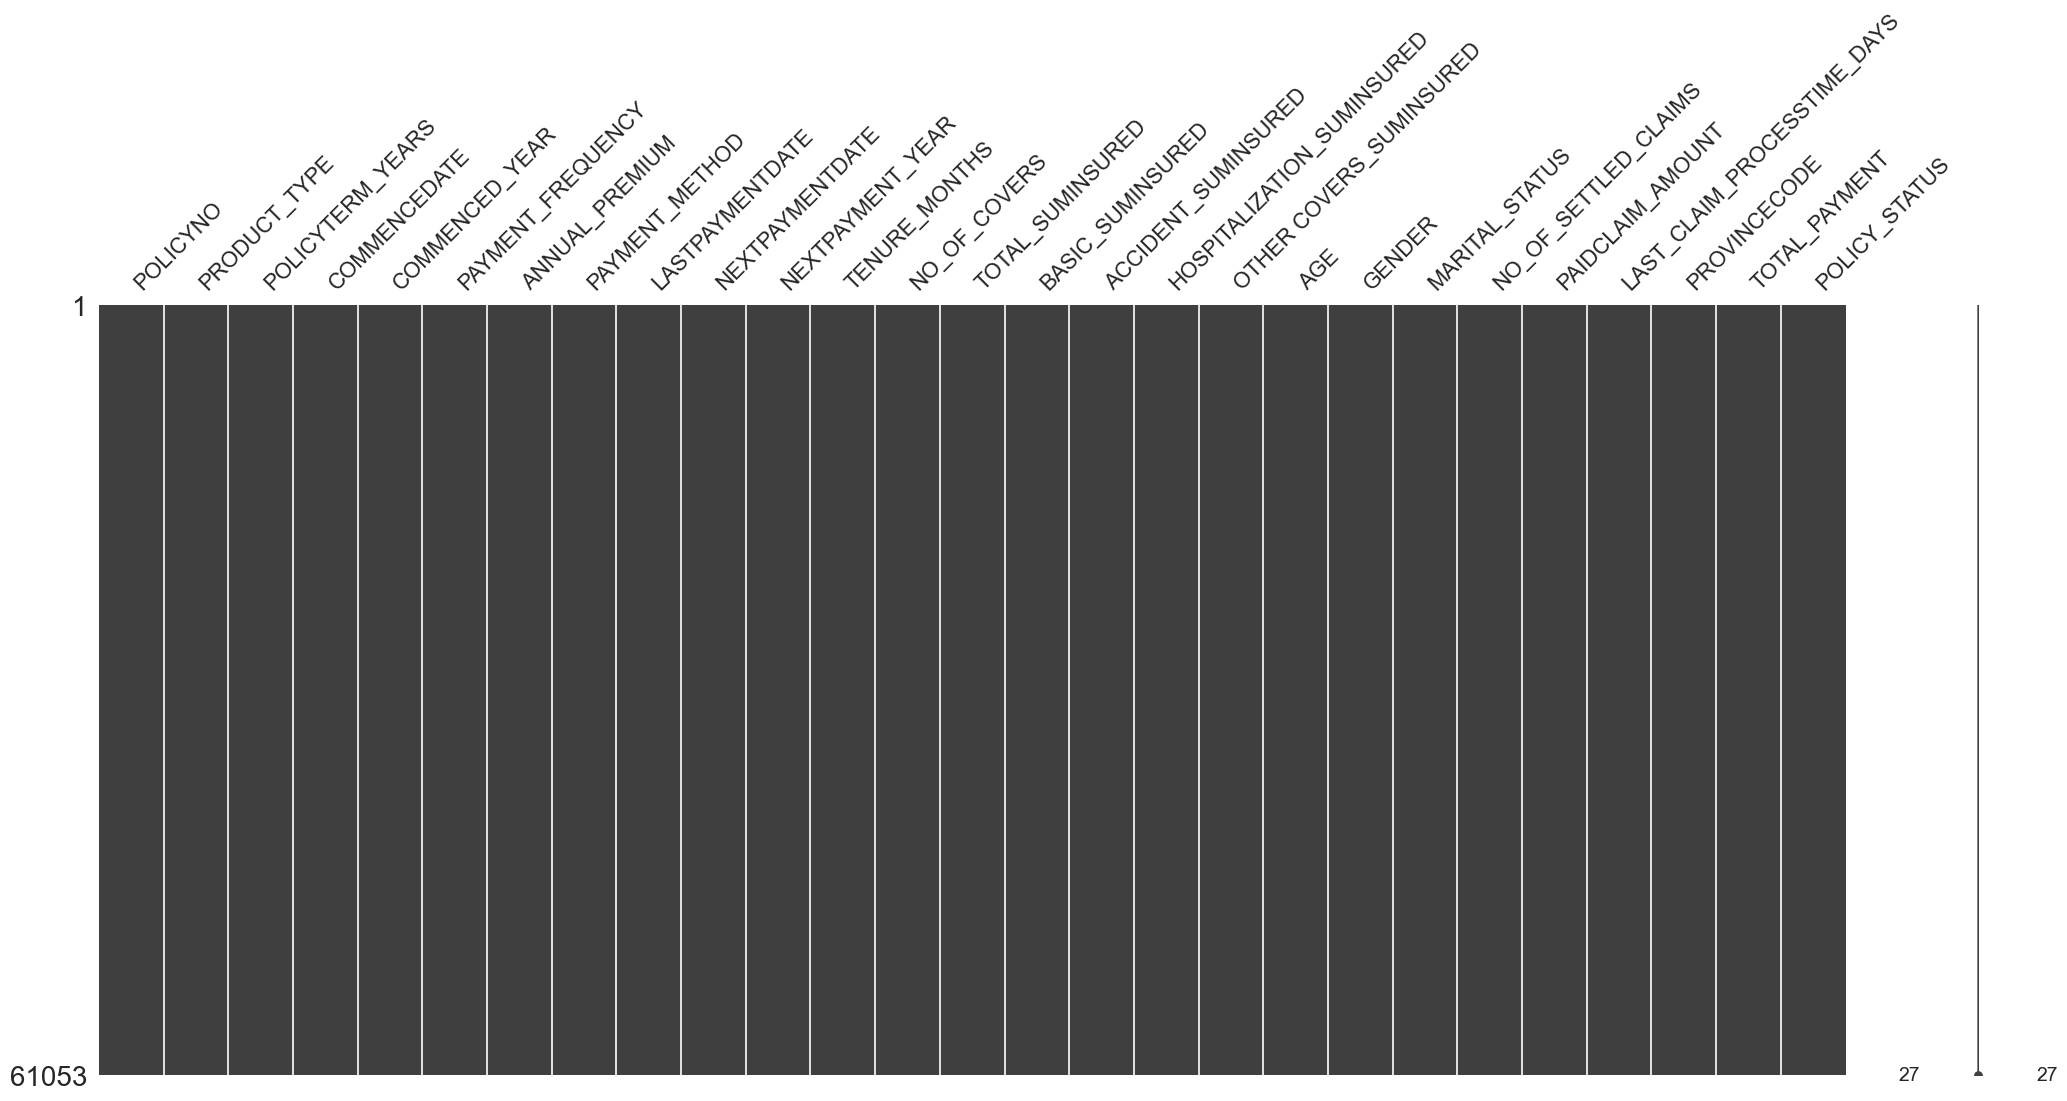

In [607]:
#Visualize Missing Values

msno.matrix(df1)


In [608]:
#Check whether there's any null values

df1.isnull().any().any()

False

In [609]:
#No of missing values in each column

df1.isnull().sum()

POLICYNO                       0
PRODUCT_TYPE                   0
POLICYTERM_YEARS               0
COMMENCEDATE                   0
COMMENCED_YEAR                 0
PAYMENT_FREQUENCY              0
ANNUAL_PREMIUM                 0
PAYMENT_METHOD                 0
LASTPAYMENTDATE                0
NEXTPAYMENTDATE                0
NEXTPAYMENT_YEAR               0
TENURE_MONTHS                  0
NO_OF_COVERS                   0
TOTAL_SUMINSURED               0
BASIC_SUMINSURED               0
ACCIDENT_SUMINSURED            0
HOSPITALIZATION_SUMINSURED     0
OTHER COVERS_SUMINSURED        0
AGE                            0
GENDER                         0
MARITAL_STATUS                 0
NO_OF_SETTLED_CLAIMS           0
PAIDCLAIM_AMOUNT               0
LAST_CLAIM_PROCESSTIME_DAYS    0
PROVINCECODE                   0
TOTAL_PAYMENT                  0
POLICY_STATUS                  0
dtype: int64

In [610]:
#Checking Duplicates

print('Known observations: {}\nUnique observations: {}'.format(len(df1.index),len(df1.drop_duplicates().index)))

print("**No duplicates Found!**")

Known observations: 61053
Unique observations: 61053
**No duplicates Found!**


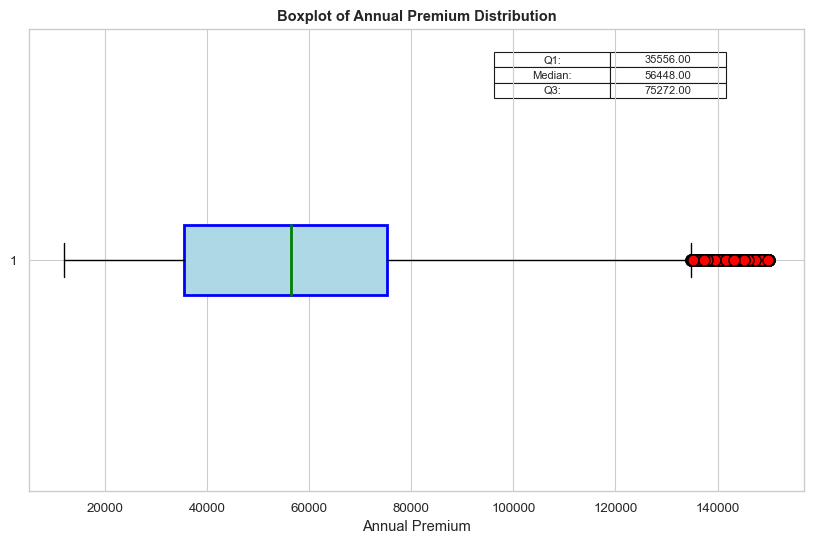

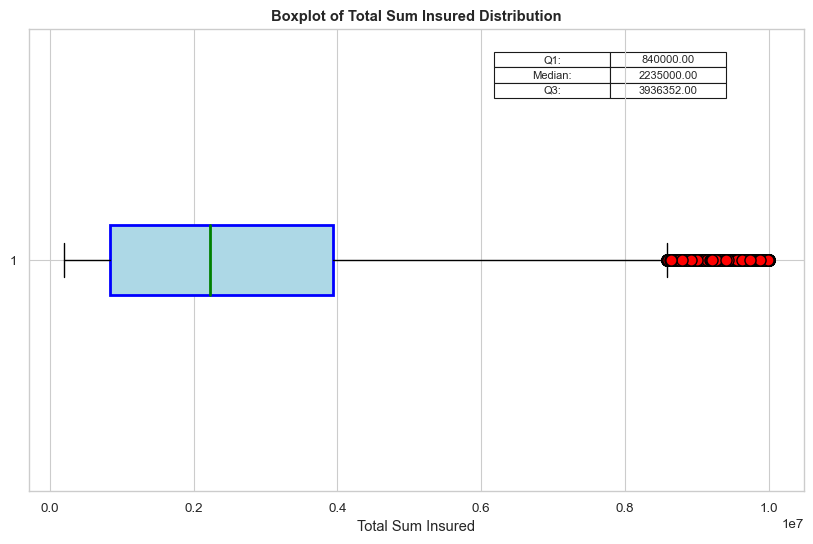

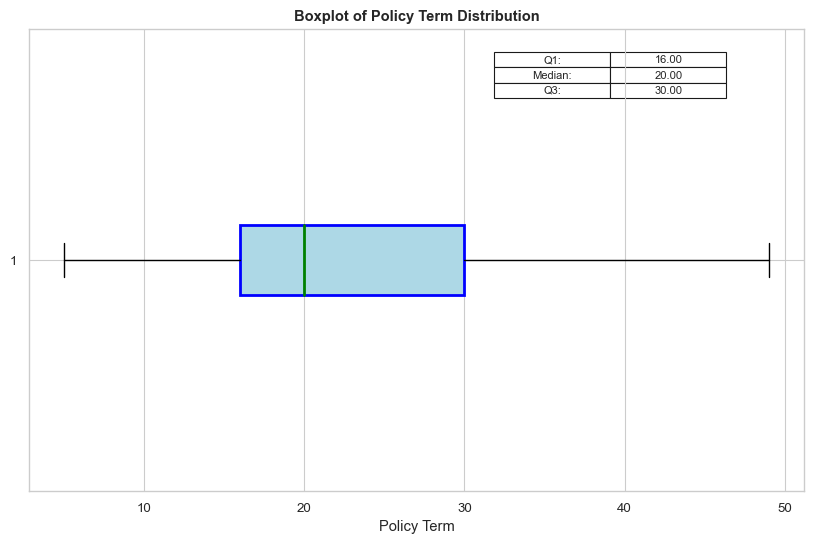

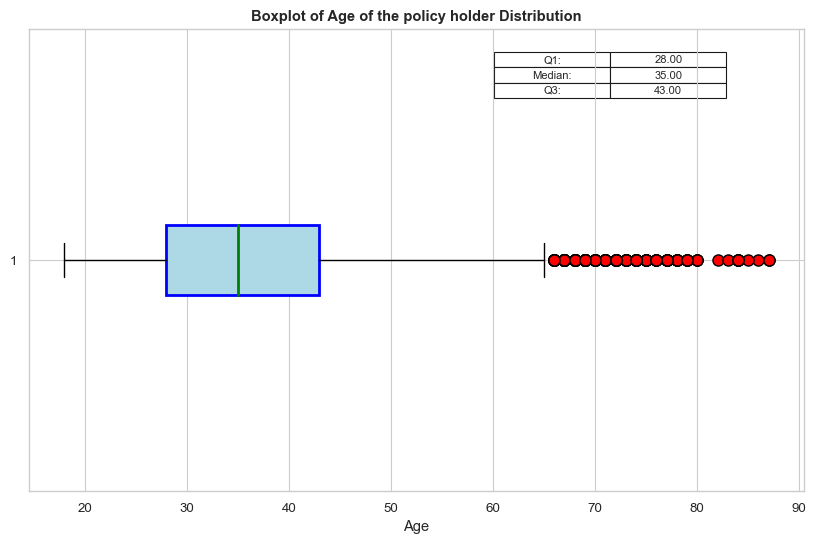

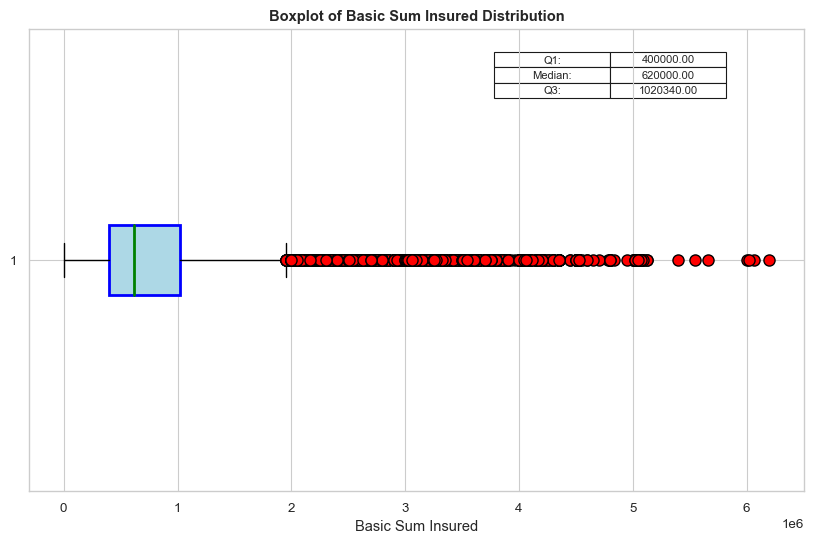

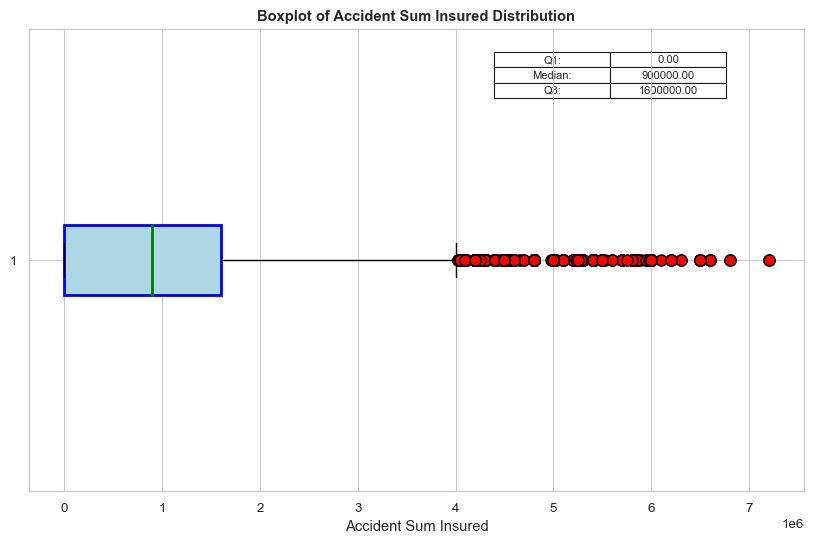

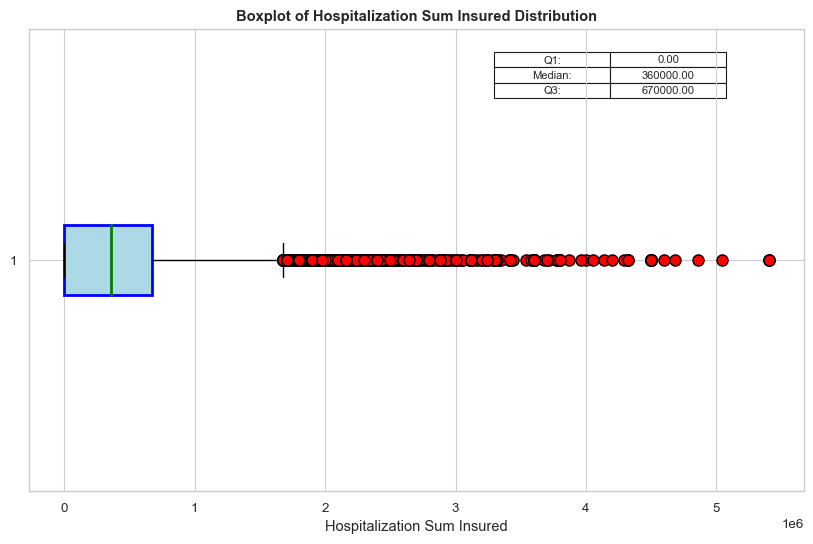

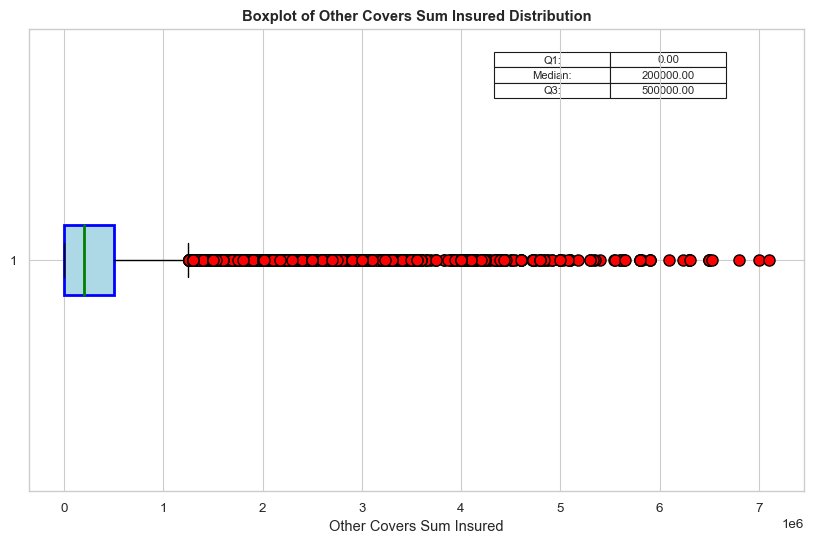

In [611]:
# Box Plots to check the distribution of data

def create_custom_boxplot(data, title, x_label):
    # Set custom styles for boxplot elements
    boxprops = dict(linestyle='-', linewidth=2, color='blue', facecolor='lightblue')  # Light blue fill color
    flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')
    medianprops = dict(linestyle='-', linewidth=2, color='green')

    # Create the boxplot
    fig, ax = plt.subplots(figsize=(10, 6))
    boxplot = ax.boxplot(data, vert=False, patch_artist=True, showfliers=True,
                         boxprops=boxprops, flierprops=flierprops, medianprops=medianprops)

    # Add title and axis labels
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel(x_label)

    # Calculate quartile values
    quartiles = np.percentile(data, [25, 50, 75])
    q1, median, q3 = quartiles[0], quartiles[1], quartiles[2]

    # Create a table to display quartile values
    table_data = [['Q1:', f'{q1:.2f}'],
                  ['Median:', f'{median:.2f}'],
                  ['Q3:', f'{q3:.2f}']]

    # Adjust the bbox parameter to move the table to the top right corner
    table = ax.table(cellText=table_data, colWidths=[0.6, 0.6], cellLoc='center', loc='upper right', bbox=[0.6, 0.85, 0.3, 0.1])
    table.auto_set_font_size(False)
    table.set_fontsize(8)

    plt.show()

# Example usage:
# Pass your data, title, and x-axis label to the function
create_custom_boxplot(df1['ANNUAL_PREMIUM'], 'Boxplot of Annual Premium Distribution', 'Annual Premium')
create_custom_boxplot(df1['TOTAL_SUMINSURED'], 'Boxplot of Total Sum Insured Distribution', 'Total Sum Insured')
create_custom_boxplot(df1['POLICYTERM_YEARS'], 'Boxplot of Policy Term Distribution', 'Policy Term')
create_custom_boxplot(df1['AGE'], 'Boxplot of Age of the policy holder Distribution', 'Age')
create_custom_boxplot(df1['BASIC_SUMINSURED'], 'Boxplot of Basic Sum Insured Distribution', 'Basic Sum Insured')
create_custom_boxplot(df1['ACCIDENT_SUMINSURED'], 'Boxplot of Accident Sum Insured Distribution', 'Accident Sum Insured')
create_custom_boxplot(df1['HOSPITALIZATION_SUMINSURED'], 'Boxplot of Hospitalization Sum Insured Distribution', 'Hospitalization Sum Insured')
create_custom_boxplot(df1['OTHER COVERS_SUMINSURED'], 'Boxplot of Other Covers Sum Insured Distribution', 'Other Covers Sum Insured')

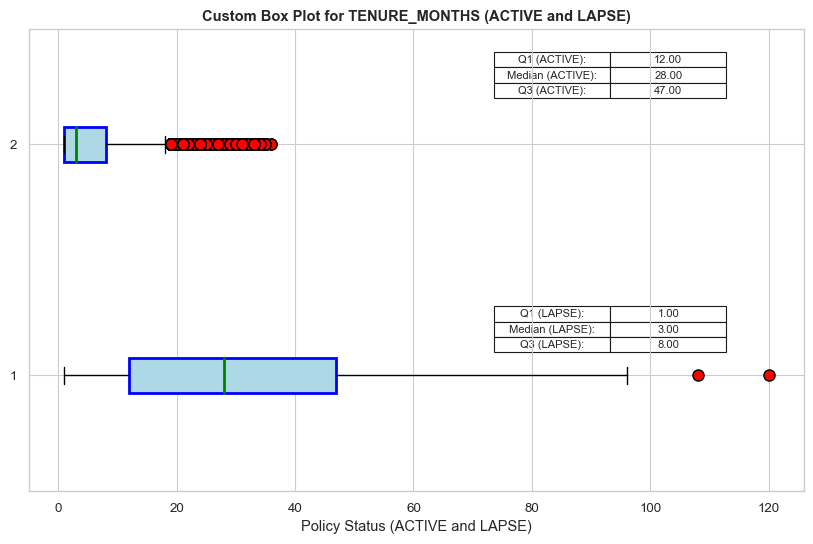

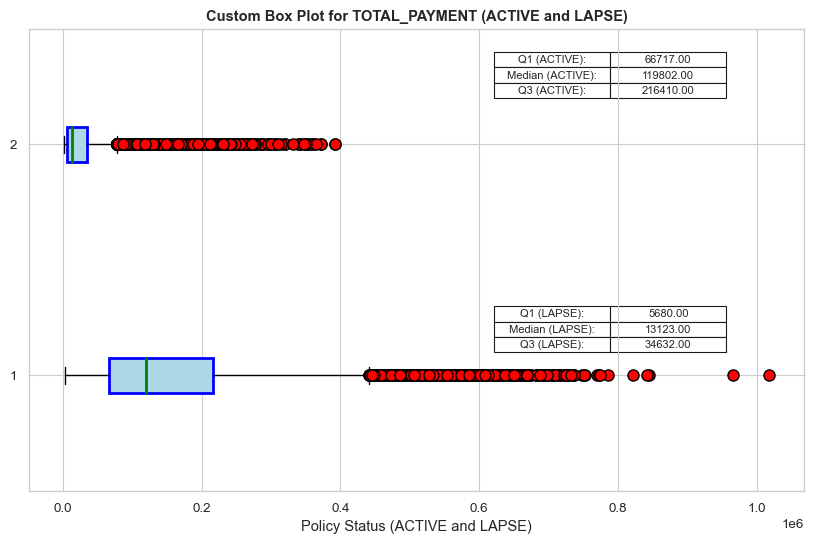

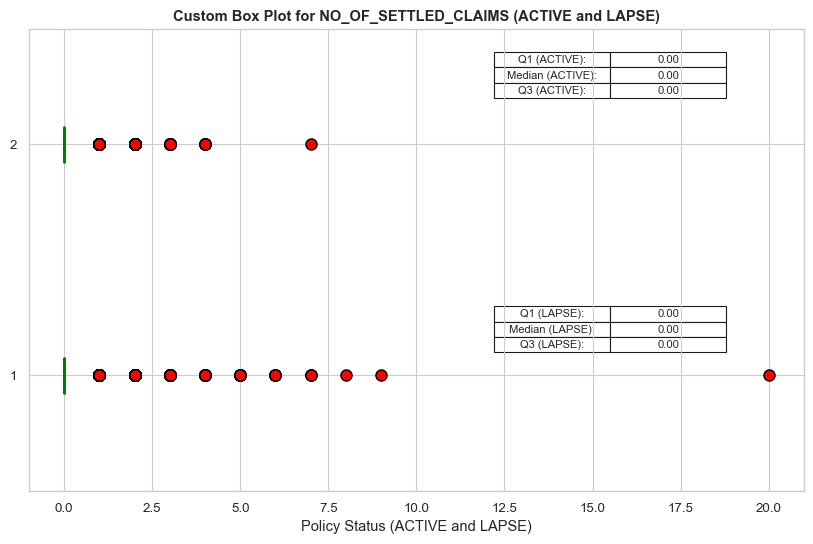

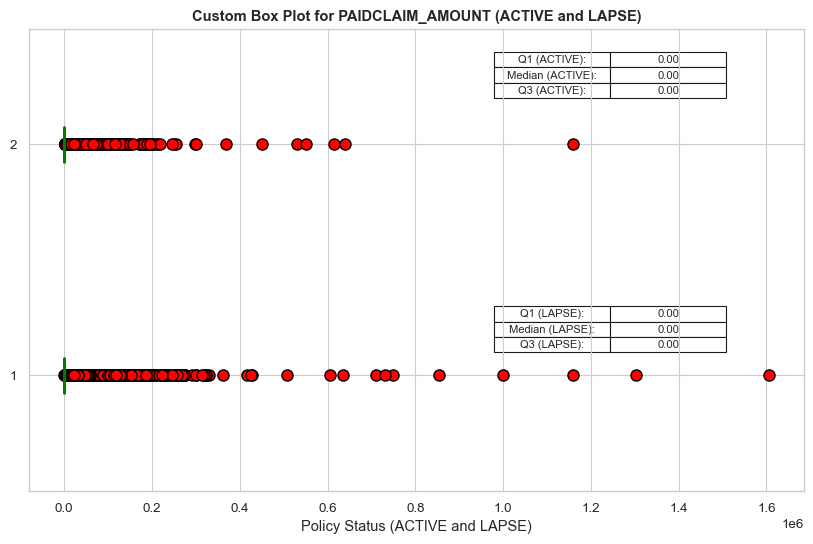

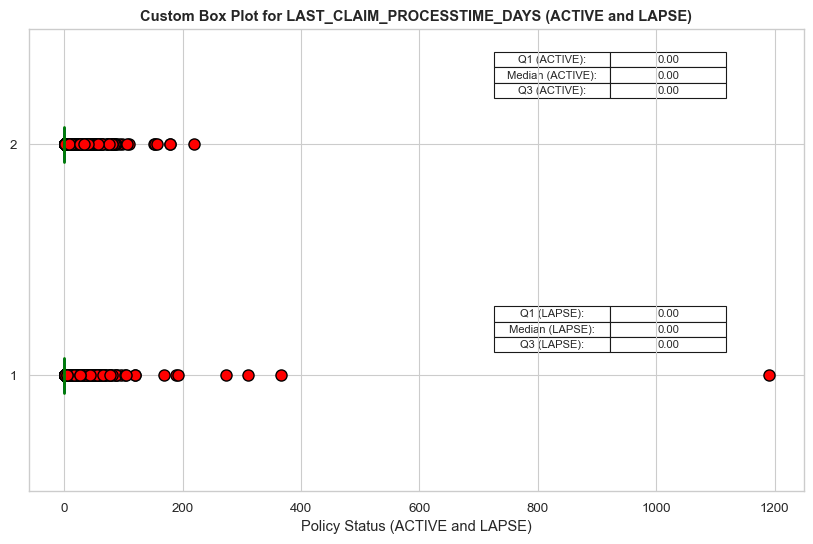

In [612]:
# Policy Status wise distribution of policies for TENURE_MONTHS, TOTAL_PAYMENT, NO_OF_SETTLED_CLAIMS, PAIDCLAIM_AMOUNT, LAST_CLAIM_PROCESSTIME_DAYS

active_data = df1[df1['POLICY_STATUS'] == 'ACTIVE']
lapse_data = df1[df1['POLICY_STATUS'] == 'LAPSE']

# Create a function to create custom box plots
def create_custom_boxplots(data1, data2, title, x_label):
    # Set custom styles for boxplot elements
    boxprops = dict(linestyle='-', linewidth=2, color='blue', facecolor='lightblue')  # Light blue fill color
    flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')
    medianprops = dict(linestyle='-', linewidth=2, color='green')

    # Create the boxplot
    fig, ax = plt.subplots(figsize=(10, 6))
    positions = [1, 2]  # Define positions for the two boxplots
    boxplot1 = ax.boxplot([data1], positions=[positions[0]], vert=False, patch_artist=True, showfliers=True,
                         boxprops=boxprops, flierprops=flierprops, medianprops=medianprops)
    
    boxplot2 = ax.boxplot([data2], positions=[positions[1]], vert=False, patch_artist=True, showfliers=True,
                         boxprops=boxprops, flierprops=flierprops, medianprops=medianprops)

    # Add title and axis labels
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel(x_label)

    # Calculate quartile values for data1
    quartiles1 = np.percentile(data1, [25, 50, 75])
    q1_1, median_1, q3_1 = quartiles1[0], quartiles1[1], quartiles1[2]

    # Calculate quartile values for data2
    quartiles2 = np.percentile(data2, [25, 50, 75])
    q1_2, median_2, q3_2 = quartiles2[0], quartiles2[1], quartiles2[2]

    # Create tables to display quartile values for data1
    table_data1 = [
        [f'Q1 (ACTIVE):', f'{q1_1:.2f}'],
        [f'Median (ACTIVE):', f'{median_1:.2f}'],
        [f'Q3 (ACTIVE):', f'{q3_1:.2f}'],
    ]

    # Create tables to display quartile values for data2
    table_data2 = [
        [f'Q1 (LAPSE):', f'{q1_2:.2f}'],
        [f'Median (LAPSE):', f'{median_2:.2f}'],
        [f'Q3 (LAPSE):', f'{q3_2:.2f}'],
    ]

    # Adjust the bbox parameter to move the tables to separate positions
    table1 = ax.table(cellText=table_data1, colWidths=[0.6, 0.6], cellLoc='center', loc='upper right', bbox=[0.6, 0.85, 0.3, 0.1])
    table1.auto_set_font_size(False)
    table1.set_fontsize(8)

    table2 = ax.table(cellText=table_data2, colWidths=[0.6, 0.6], cellLoc='center', loc='lower right', bbox=[0.6, 0.3, 0.3, 0.1])
    table2.auto_set_font_size(False)
    table2.set_fontsize(8)

    plt.show()



# Call the function to create the box plots
create_custom_boxplots(active_data['TENURE_MONTHS'], lapse_data['TENURE_MONTHS'], "Custom Box Plot for TENURE_MONTHS (ACTIVE and LAPSE)", "Policy Status (ACTIVE and LAPSE)")
create_custom_boxplots(active_data['TOTAL_PAYMENT'], lapse_data['TOTAL_PAYMENT'], "Custom Box Plot for TOTAL_PAYMENT (ACTIVE and LAPSE)", "Policy Status (ACTIVE and LAPSE)")
create_custom_boxplots(active_data['NO_OF_SETTLED_CLAIMS'], lapse_data['NO_OF_SETTLED_CLAIMS'], "Custom Box Plot for NO_OF_SETTLED_CLAIMS (ACTIVE and LAPSE)", "Policy Status (ACTIVE and LAPSE)")
create_custom_boxplots(active_data['PAIDCLAIM_AMOUNT'], lapse_data['PAIDCLAIM_AMOUNT'], "Custom Box Plot for PAIDCLAIM_AMOUNT (ACTIVE and LAPSE)", "Policy Status (ACTIVE and LAPSE)")
create_custom_boxplots(active_data['LAST_CLAIM_PROCESSTIME_DAYS'], lapse_data['LAST_CLAIM_PROCESSTIME_DAYS'], "Custom Box Plot for LAST_CLAIM_PROCESSTIME_DAYS (ACTIVE and LAPSE)", "Policy Status (ACTIVE and LAPSE)")


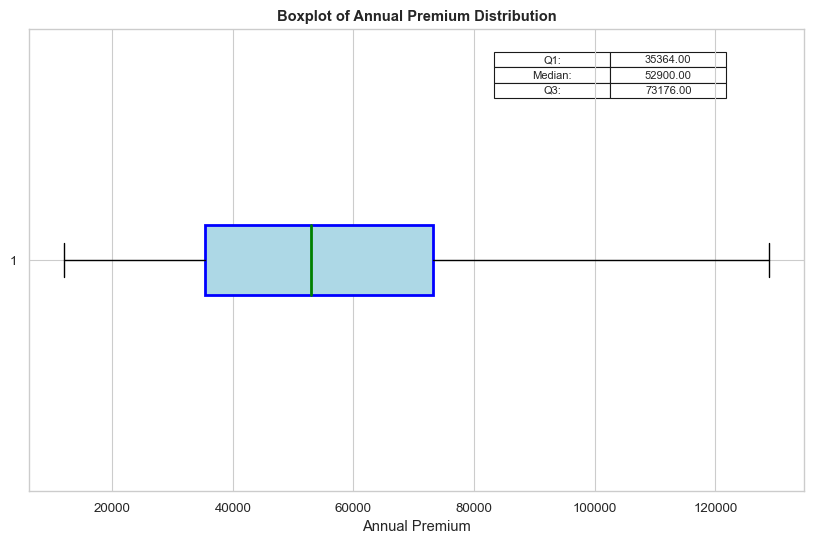

In [613]:
# Remove Outliers from Annual Premium Value

column_name = 'ANNUAL_PREMIUM'
z_scores = stats.zscore(df1[column_name])  # Calculate the z-scores for the column
threshold = 2.3 # Define a threshold for identifying outliers
outlier_mask = (abs(z_scores) < threshold)
df1 = df1[outlier_mask]

create_custom_boxplot(df1['ANNUAL_PREMIUM'], 'Boxplot of Annual Premium Distribution', 'Annual Premium')


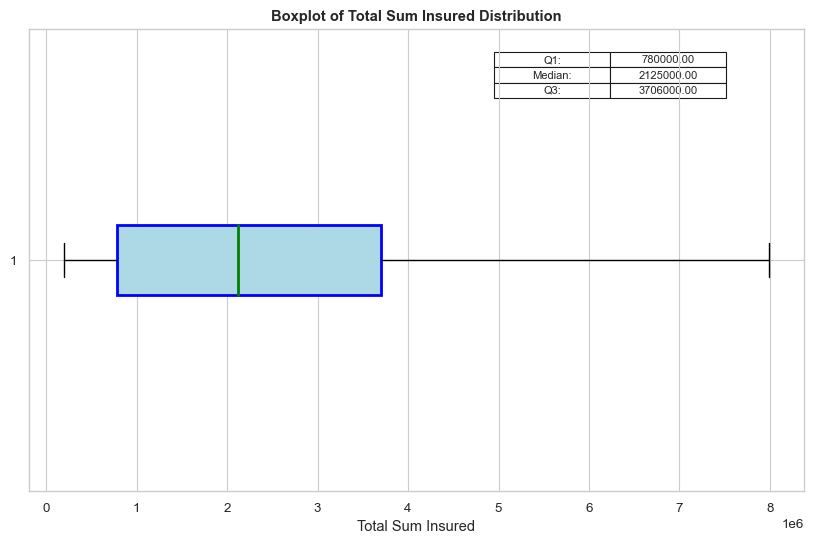

In [614]:
# Remove Outliers from Total Sum Insured

column_name = 'TOTAL_SUMINSURED'
z_scores = stats.zscore(df1[column_name])  # Calculate the z-scores for the column
threshold = 2.6 # Define a threshold for identifying outliers
outlier_mask = (abs(z_scores) < threshold)
df1 = df1[outlier_mask]

create_custom_boxplot(df1['TOTAL_SUMINSURED'], 'Boxplot of Total Sum Insured Distribution', 'Total Sum Insured')


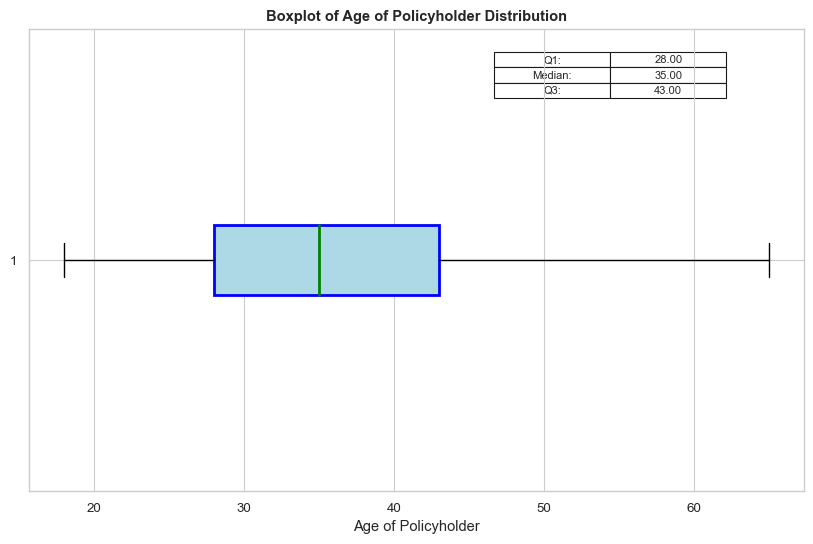

In [615]:
# Remove Outliers from Age of the Policy Holder

column_name = 'AGE'
z_scores = stats.zscore(df1[column_name])  # Calculate the z-scores for the column
threshold = 2.8 # Define a threshold for identifying outliers
outlier_mask = (abs(z_scores) < threshold)
df1 = df1[outlier_mask]

create_custom_boxplot(df1['AGE'], 'Boxplot of Age of Policyholder Distribution', 'Age of Policyholder')

In [616]:
# Drop the columns

df1 = df1.drop(["COMMENCEDATE","LASTPAYMENTDATE","NEXTPAYMENTDATE","PROVINCECODE","NO_OF_SETTLED_CLAIMS","PAIDCLAIM_AMOUNT","LAST_CLAIM_PROCESSTIME_DAYS"], axis = 1)
df1.head()

,POLICYNO,PRODUCT_TYPE,POLICYTERM_YEARS,COMMENCED_YEAR,PAYMENT_FREQUENCY,ANNUAL_PREMIUM,PAYMENT_METHOD,NEXTPAYMENT_YEAR,TENURE_MONTHS,NO_OF_COVERS,TOTAL_SUMINSURED,BASIC_SUMINSURED,ACCIDENT_SUMINSURED,HOSPITALIZATION_SUMINSURED,OTHER COVERS_SUMINSURED,AGE,GENDER,MARITAL_STATUS,TOTAL_PAYMENT,POLICY_STATUS
0,NJEV2018-453,ENDOW,49,2018,M,24732,CASH,2018,3,1,500000,500000,0,0,0,32,M,M,6183,LAPSE
1,NJEV2018-2541,ENDOW,49,2018,M,24732,CASH,2018,1,1,500000,500000,0,0,0,32,M,M,2061,LAPSE
2,NJEV2018-1209,ENDOW,49,2018,M,24732,CASH,2018,1,1,500000,500000,0,0,0,32,M,M,2061,LAPSE
3,NJEV2018-1378,ENDOW,49,2018,M,24732,CASH,2020,21,1,500000,500000,0,0,0,32,F,M,43281,LAPSE
4,NJEV2018-1853,ENDOW,49,2018,M,24732,CASH,2018,1,1,500000,500000,0,0,0,32,M,M,2061,LAPSE


In [617]:
#Shape of the dataframe after removing outliers

print("The shape of the dataframe after removing outliers is: {}".format(df1.shape))

The shape of the dataframe after removing outliers is: (57792, 20)


In [618]:

# Group the data by POLICY_STATUS and count occurrences

policy_status_counts = df1['POLICY_STATUS'].value_counts()
percentage = (policy_status_counts / policy_status_counts.sum()) * 100
policy_status_summary = pd.DataFrame({'Count': policy_status_counts, 'Percentage': percentage})

policy_status_summary.rename(columns={'index': 'POLICY_STATUS'}, inplace=True)
policy_status_summary.sort_values(by='Count', ascending=True, inplace=True)

print(policy_status_summary)


               Count  Percentage
POLICY_STATUS                   
ACTIVE         11549   19.983735
LAPSE          46243   80.016265


In [619]:
#Find unique values in categorical variables

catagorical = [i for i in df1.columns if df1[i].dtypes == 'object']

for i in catagorical:   
    print(i, ':', df1[i].unique())

POLICYNO : ['NJEV2018-453' 'NJEV2018-2541' 'NJEV2018-1209' ... 'NGT022018-97'
 'JCA012018-552' 'JCA012018-25']
PRODUCT_TYPE : ['ENDOW' 'UL']
PAYMENT_FREQUENCY : ['M' 'A' 'Q' 'H']
PAYMENT_METHOD : ['CASH' 'STANDING ORDER' 'DIGITAL PAYMENT']
GENDER : ['M' 'F']
MARITAL_STATUS : ['M' 'S']
POLICY_STATUS : ['LAPSE' 'ACTIVE']


In [620]:
#Count unique values in categorical variables

df1.describe(include=['object']).T

,count,unique,top,freq
POLICYNO,57792,57792,NJEV2018-453,1
PRODUCT_TYPE,57792,2,ENDOW,38749
PAYMENT_FREQUENCY,57792,4,M,45349
PAYMENT_METHOD,57792,3,CASH,48232
GENDER,57792,2,M,33479
MARITAL_STATUS,57792,2,M,42814
POLICY_STATUS,57792,2,LAPSE,46243


In [621]:
# Shows statistical summaries for all numeric columns

df1.describe()

,POLICYTERM_YEARS,COMMENCED_YEAR,ANNUAL_PREMIUM,NEXTPAYMENT_YEAR,TENURE_MONTHS,NO_OF_COVERS,TOTAL_SUMINSURED,BASIC_SUMINSURED,ACCIDENT_SUMINSURED,HOSPITALIZATION_SUMINSURED,OTHER COVERS_SUMINSURED,AGE,TOTAL_PAYMENT
count,57792.000000,57792.000000,57792.000000,57792.000000,57792.000000,57792.000000,5.779200e+04,5.779200e+04,5.779200e+04,5.779200e+04,5.779200e+04,57792.000000,5.779200e+04
mean,24.423830,2020.229738,57055.064542,2021.058070,10.582261,3.001782,2.494792e+06,7.843909e+05,9.756664e+05,4.099654e+05,3.247693e+05,35.974841,5.138677e+04
std,12.208092,1.423025,26483.025065,1.637067,14.200604,1.312439,1.862267e+06,5.580847e+05,1.028994e+06,4.217010e+05,4.344359e+05,10.276551,7.949451e+04
min,5.000000,2018.000000,12024.000000,2018.000000,1.000000,1.000000,2.000000e+05,4.068000e+03,0.000000e+00,0.000000e+00,0.000000e+00,18.000000,1.504000e+03
25%,16.000000,2019.000000,35244.000000,2020.000000,1.000000,1.000000,7.980000e+05,4.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,28.000000,6.139000e+03
50%,20.000000,2021.000000,50892.000000,2021.000000,4.000000,4.000000,2.140000e+06,6.000000e+05,8.000000e+05,3.600000e+05,2.000000e+05,35.000000,1.993700e+04
75%,35.000000,2021.000000,72480.000000,2022.000000,12.000000,4.000000,3.720000e+06,1.008176e+06,1.500000e+06,6.250000e+05,5.000000e+05,43.000000,6.057775e+04
max,49.000000,2022.000000,128853.000000,2029.000000,120.000000,6.000000,7.985570e+06,6.016352e+06,6.500000e+06,5.400000e+06,5.640000e+06,65.000000,1.017500e+06


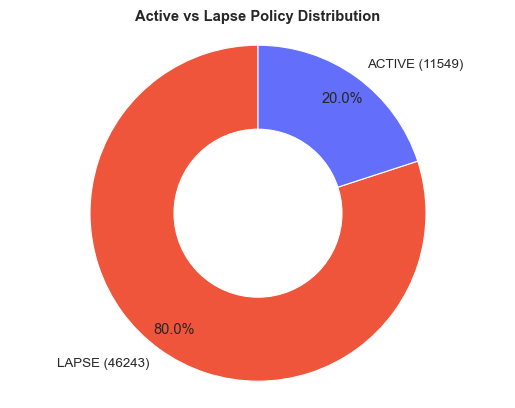

In [622]:
# Active and Lapse Policy Distribution

policy_status_counts = df1['POLICY_STATUS'].value_counts()
type_ = policy_status_counts.index
values = policy_status_counts.values
custom_colors = ['#EF553B', '#636EFA']

# Create labels with counts
labels = [f"{t} ({v})" for t, v in zip(type_, values)]

# Create a donut chart
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%', colors=custom_colors, startangle=90, pctdistance=0.85)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Draw a white circle at the center to make it a donut chart
center_circle = plt.Circle((0, 0), 0.50, fc='white')
fig.gca().add_artist(center_circle)

# Add a title
plt.title(f"Active vs Lapse Policy Distribution", fontweight='bold')

# Show the chart
plt.show()

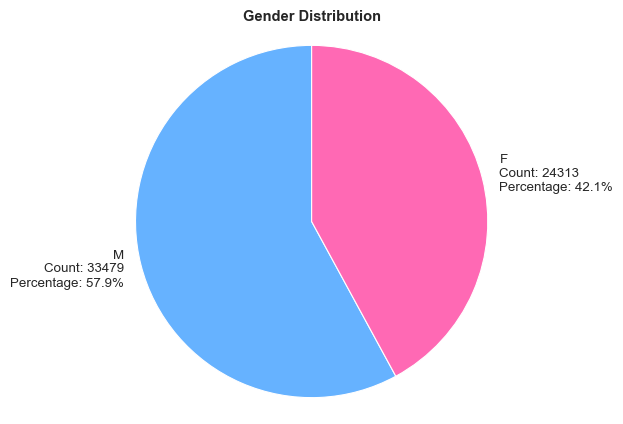

In [623]:
#Pie chart which represents Gender distribution of policy holders

# Calculate gender counts
gender_counts = df1['GENDER'].value_counts()

# Calculate percentages
total_count = len(df1)
gender_percentages = (gender_counts / total_count) * 100

# Define custom colors
custom_colors = ['#66B2FF', 'hotpink']  # Custom colors for Male and Female

# Create pie chart labels with gender, count, and percentage
labels = gender_counts.index
labels_with_info = [f"{gender}\nCount: {count}\nPercentage: {percentage:.1f}%" for gender, count, percentage in zip(labels, gender_counts, gender_percentages)]

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=labels_with_info, autopct='', colors=custom_colors, startangle=90)
plt.title("Gender Distribution",fontweight='bold')

# Display the chart
plt.axis('equal')
plt.show()

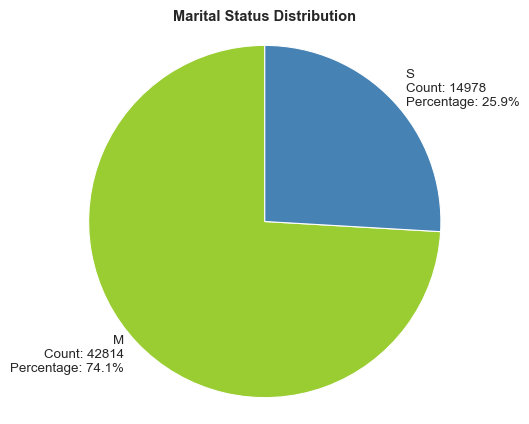

In [624]:
#Pie chart which represents distribution of Marital Status of policy holders

# Calculate marital status counts
marital_status_counts = df1['MARITAL_STATUS'].value_counts()

# Calculate percentages
total_count = len(df1)
marital_status_percentages = (marital_status_counts / total_count) * 100

# Define custom colors
custom_colors = ['yellowgreen', 'steelblue']  # Custom colors for Married and Single

# Create pie chart labels with marital status, count, and percentage
labels = marital_status_counts.index
labels_with_info = [f"{marital_status}\nCount: {count}\nPercentage: {percentage:.1f}%" for marital_status, count, percentage in zip(labels, marital_status_counts, marital_status_percentages)]

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(marital_status_counts, labels=labels_with_info, autopct='', colors=custom_colors, startangle=90)
plt.title("Marital Status Distribution", fontweight='bold')

# Display the chart
plt.axis('equal')
plt.show()

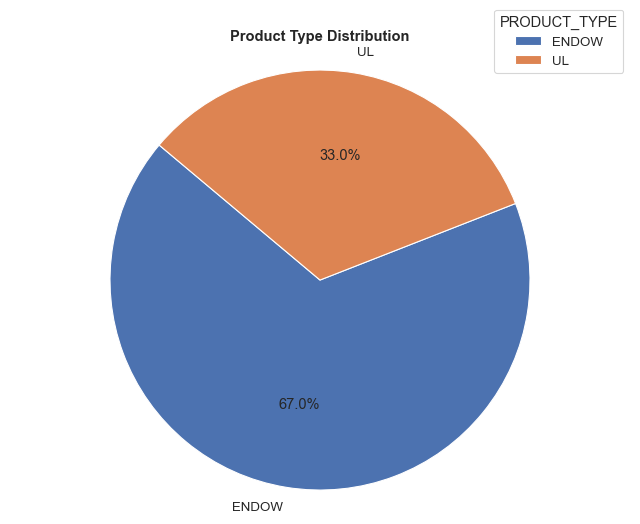

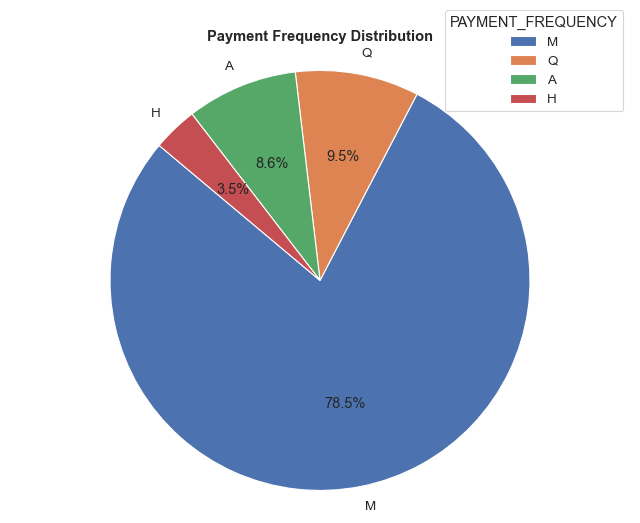

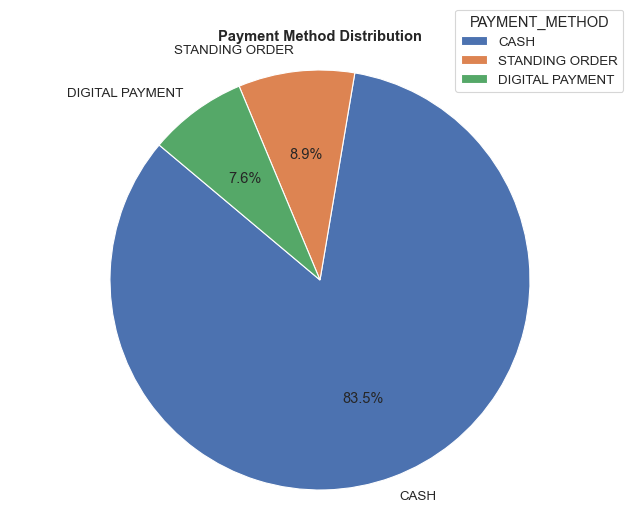

In [625]:
#Pie Charts for Product Type, Payment Frequecy, Payment Method

def create_pie_chart(data, column_name, title):
    # Group the data by the specified column and count the number of occurrences for each category
    column_counts = data[column_name].value_counts()

    # Create a pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(column_counts, labels=column_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(title, fontweight='bold')
    plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.

    # Add a legend
    plt.legend(column_counts.index, title=column_name, loc='upper right', bbox_to_anchor=(1, 1.1))

    plt.show()


create_pie_chart(df1, 'PRODUCT_TYPE', 'Product Type Distribution')
create_pie_chart(df1, 'PAYMENT_FREQUENCY', 'Payment Frequency Distribution')
create_pie_chart(df1, 'PAYMENT_METHOD', 'Payment Method Distribution')


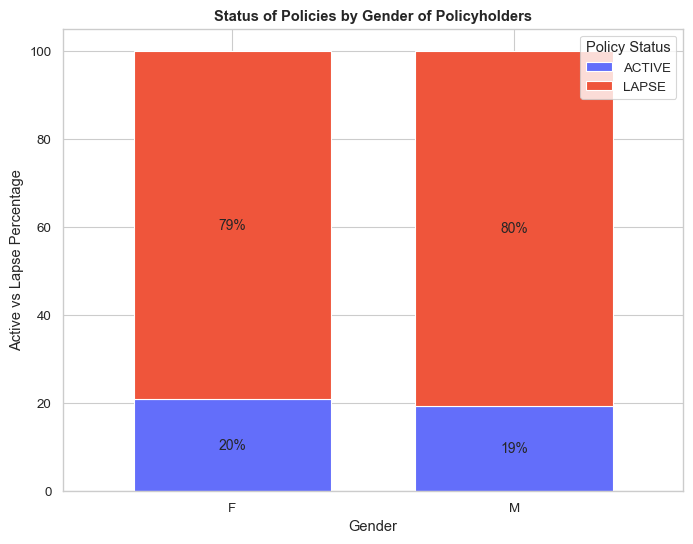

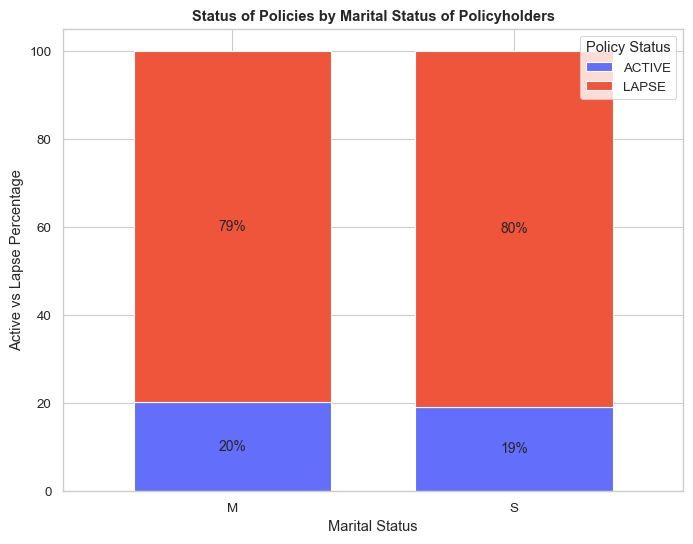

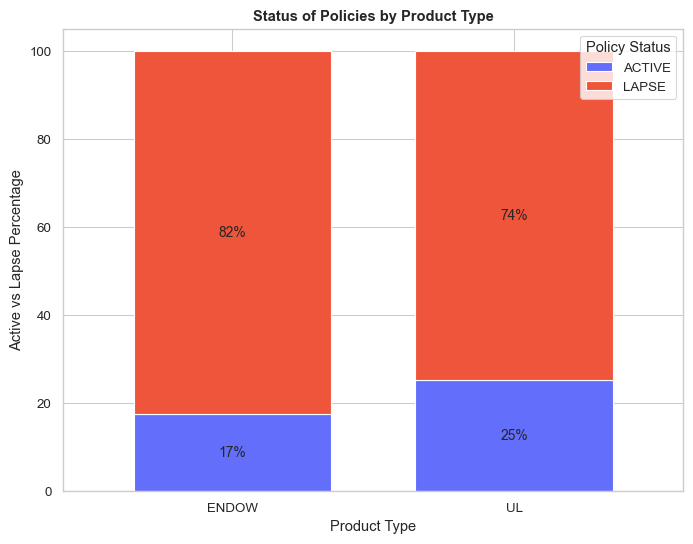

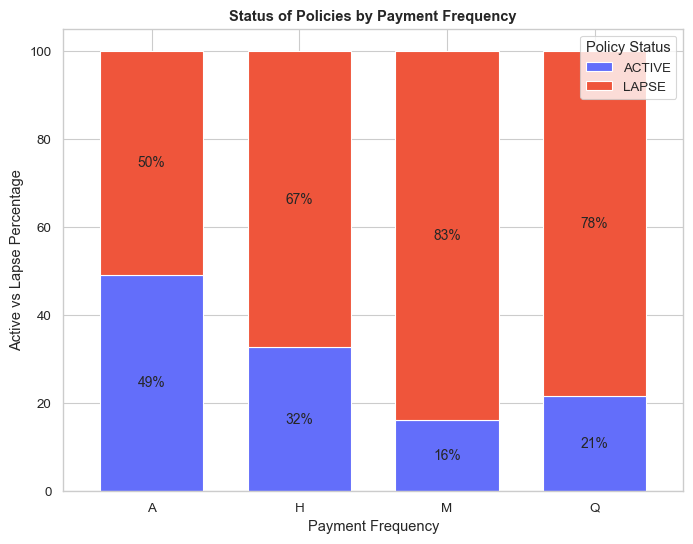

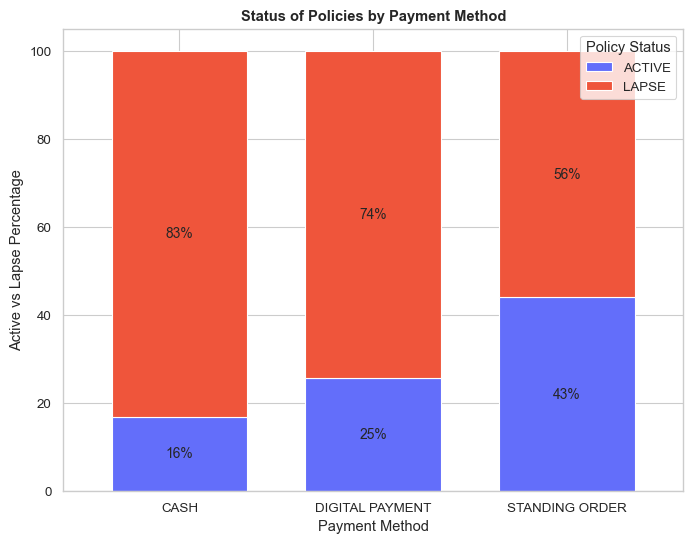

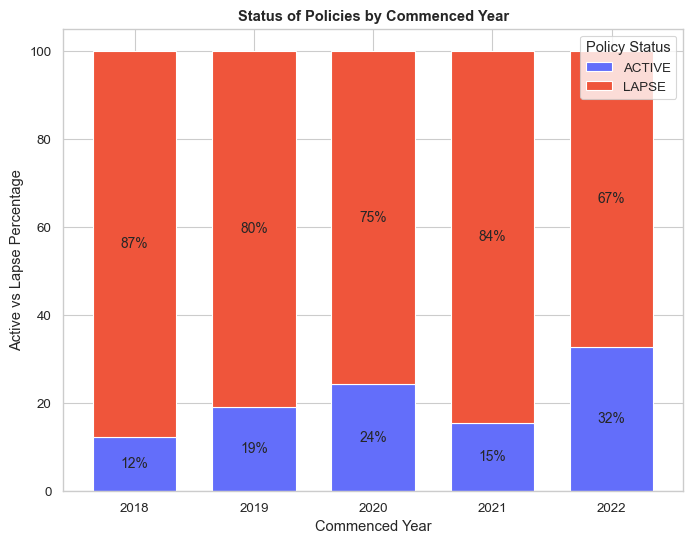

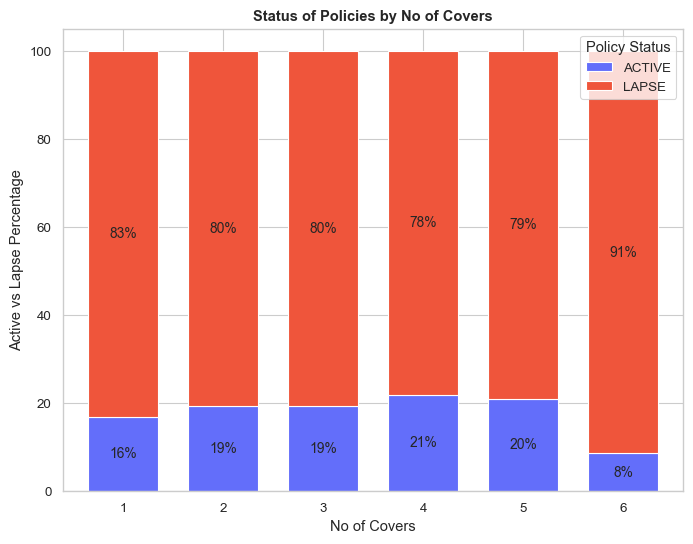

In [626]:
# Stacked bar charts to present the Active vs Lapse policy distribution of different categorical variables

def create_stacked_bar_chart(data, x_column, y_column, title, xlabel, ylabel, legend_title):
    # Group the data by the specified columns and count the number of occurrences in each group
    grouped = data.groupby([x_column, y_column]).size().unstack(fill_value=0)

    # Calculate the total count of items for each group
    total_counts = grouped.sum(axis=1)

    # Calculate the percentages
    percentage_grouped = grouped.div(total_counts, axis=0) * 100

    # Define custom colors for each category within the y_column
    custom_colors = {
        'ACTIVE': '#636EFA',
        'LAPSE': '#EF553B'
    }

    # Create the stacked bar chart with custom colors
    ax = percentage_grouped.plot(kind='bar', stacked=True, figsize=(8, 6), color=[custom_colors.get(col, '#A9A9A9') for col in percentage_grouped.columns], width=0.7)

    # Add data labels and percentages to each segment
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{int(height)}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10)

    plt.title(title, fontweight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Move the legend to the bottom
    plt.legend(title=legend_title, loc='upper right')

    plt.xticks(rotation=0)

    plt.show()


create_stacked_bar_chart(df1, 'GENDER', 'POLICY_STATUS', 'Status of Policies by Gender of Policyholders','Gender', 'Active vs Lapse Percentage', 'Policy Status')
create_stacked_bar_chart(df1, 'MARITAL_STATUS', 'POLICY_STATUS', 'Status of Policies by Marital Status of Policyholders','Marital Status', 'Active vs Lapse Percentage', 'Policy Status')
create_stacked_bar_chart(df1, 'PRODUCT_TYPE', 'POLICY_STATUS', 'Status of Policies by Product Type','Product Type', 'Active vs Lapse Percentage', 'Policy Status')
create_stacked_bar_chart(df1, 'PAYMENT_FREQUENCY', 'POLICY_STATUS', 'Status of Policies by Payment Frequency','Payment Frequency', 'Active vs Lapse Percentage', 'Policy Status')
create_stacked_bar_chart(df1, 'PAYMENT_METHOD', 'POLICY_STATUS', 'Status of Policies by Payment Method','Payment Method', 'Active vs Lapse Percentage', 'Policy Status')
create_stacked_bar_chart(df1, 'COMMENCED_YEAR', 'POLICY_STATUS', 'Status of Policies by Commenced Year','Commenced Year', 'Active vs Lapse Percentage', 'Policy Status')
create_stacked_bar_chart(df1, 'NO_OF_COVERS', 'POLICY_STATUS', 'Status of Policies by No of Covers','No of Covers', 'Active vs Lapse Percentage', 'Policy Status')

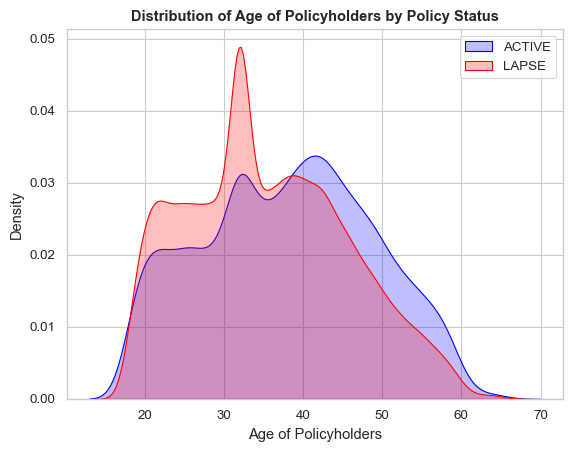

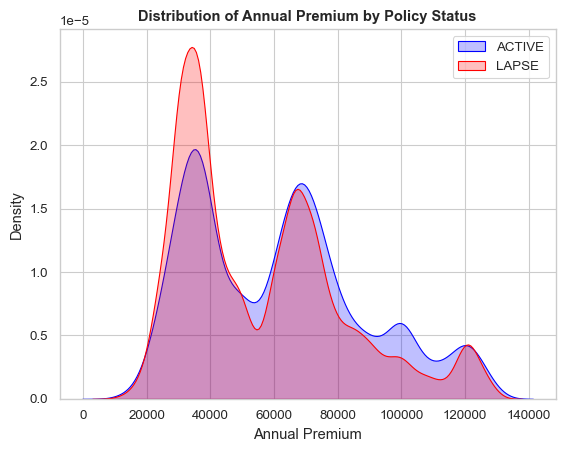

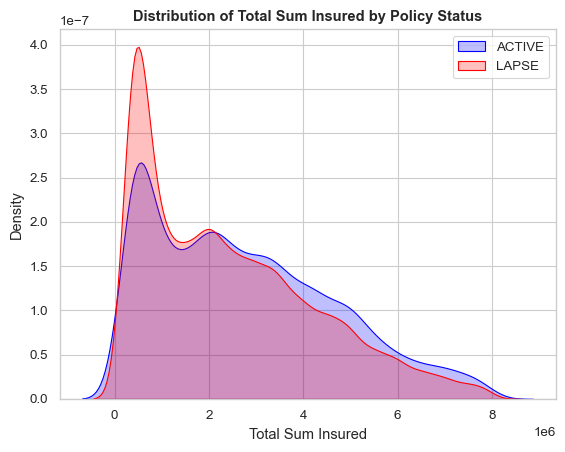

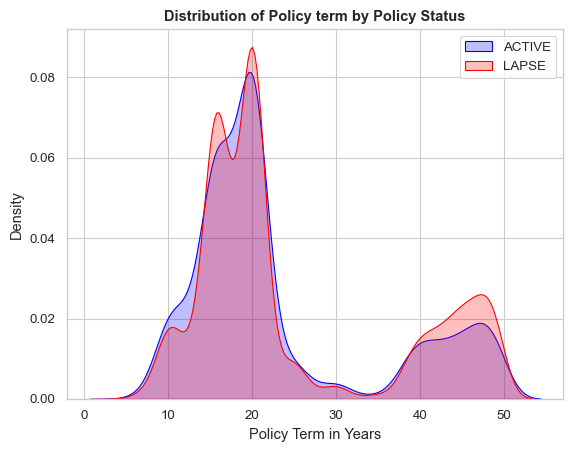

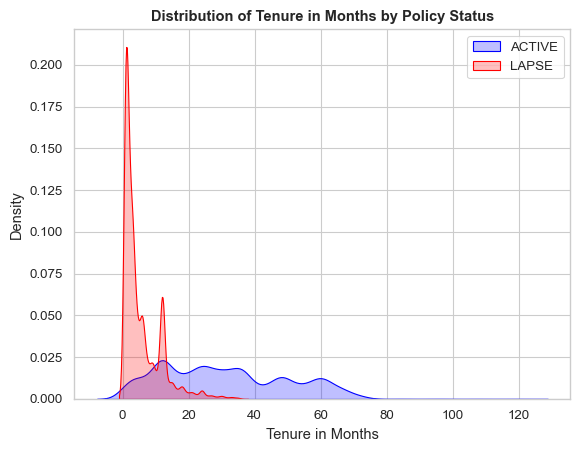

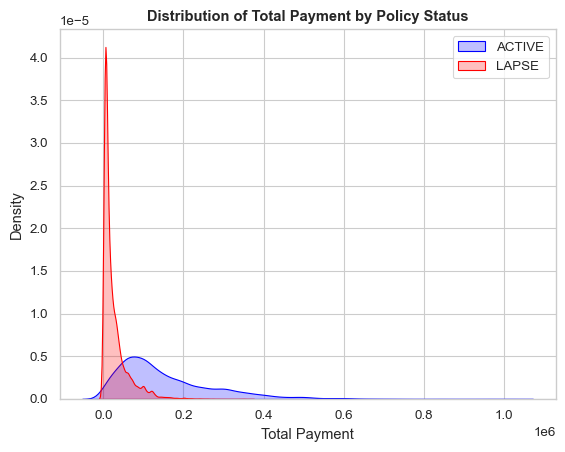

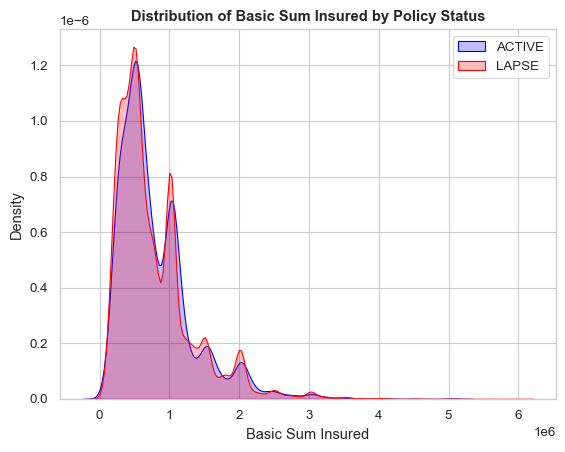

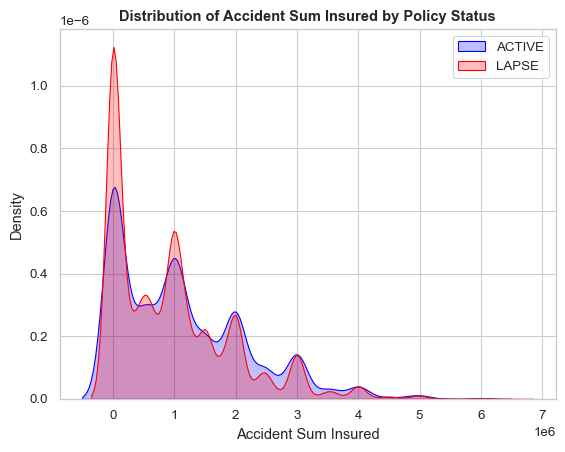

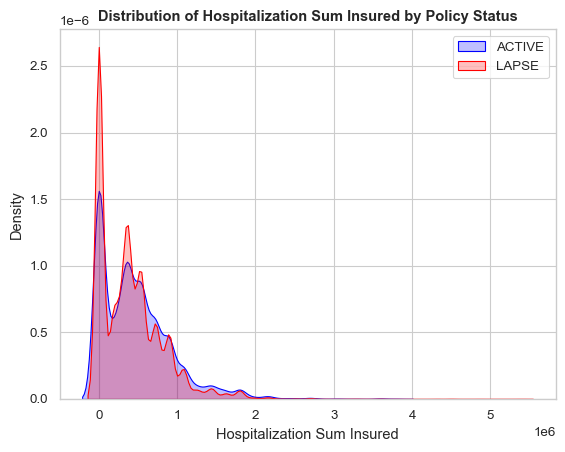

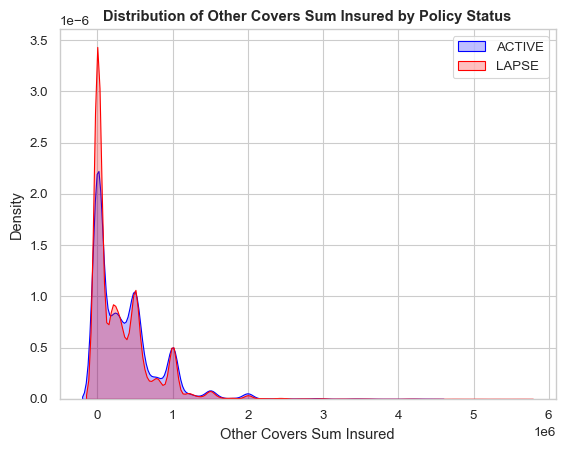

In [627]:
#Density plots to present the distribution of Active vs Lapse Policies with respect to different numerical variables

def create_density_plot(data, column, title, x_label, legend_labels, fill_colors):
    sns.set_context("paper", font_scale=1.1)
    ax = sns.kdeplot(data[column][data["POLICY_STATUS"] == legend_labels[0]], color=fill_colors[0], fill=True)
    for i in range(1, len(legend_labels)):
        ax = sns.kdeplot(data[column][data["POLICY_STATUS"] == legend_labels[i]], ax=ax, color=fill_colors[i], fill=True)
    ax.legend(legend_labels, loc='upper right')
    ax.set_ylabel('Density')
    ax.set_xlabel(x_label)
    ax.set_title(title, fontweight='bold')
    plt.show()


legend_labels = ['ACTIVE', 'LAPSE']
fill_colors = ['Blue', 'Red']

create_density_plot(df1, 'AGE', 'Distribution of Age of Policyholders by Policy Status', 'Age of Policyholders', legend_labels, fill_colors)
create_density_plot(df1, 'ANNUAL_PREMIUM', 'Distribution of Annual Premium by Policy Status', 'Annual Premium', legend_labels, fill_colors)
create_density_plot(df1, 'TOTAL_SUMINSURED', 'Distribution of Total Sum Insured by Policy Status', 'Total Sum Insured', legend_labels, fill_colors)
create_density_plot(df1, 'POLICYTERM_YEARS', 'Distribution of Policy term by Policy Status', 'Policy Term in Years', legend_labels, fill_colors)
create_density_plot(df1, 'TENURE_MONTHS', 'Distribution of Tenure in Months by Policy Status', 'Tenure in Months', legend_labels, fill_colors)
create_density_plot(df1, 'TOTAL_PAYMENT', 'Distribution of Total Payment by Policy Status', 'Total Payment', legend_labels, fill_colors)
create_density_plot(df1, 'BASIC_SUMINSURED', 'Distribution of Basic Sum Insured by Policy Status', 'Basic Sum Insured', legend_labels, fill_colors)
create_density_plot(df1, 'ACCIDENT_SUMINSURED', 'Distribution of Accident Sum Insured by Policy Status', 'Accident Sum Insured', legend_labels, fill_colors)
create_density_plot(df1, 'HOSPITALIZATION_SUMINSURED', 'Distribution of Hospitalization Sum Insured by Policy Status', 'Hospitalization Sum Insured', legend_labels, fill_colors)
create_density_plot(df1, 'OTHER COVERS_SUMINSURED', 'Distribution of Other Covers Sum Insured by Policy Status', 'Other Covers Sum Insured', legend_labels, fill_colors)



In [628]:
# Select categorical variables (object or category dtype)
categorical_vars = df1.select_dtypes(include=['object', 'category'])

# Select numerical variables (int or float dtype)
numerical_vars = df1.select_dtypes(include=['int', 'float'])

# Example of printing the lists of variables
print("Categorical Variables:")
print(categorical_vars.columns.tolist())

print("\nNumerical Variables:")
print(numerical_vars.columns.tolist())

Categorical Variables:
['POLICYNO', 'PRODUCT_TYPE', 'PAYMENT_FREQUENCY', 'PAYMENT_METHOD', 'GENDER', 'MARITAL_STATUS', 'POLICY_STATUS']

Numerical Variables:
['POLICYTERM_YEARS', 'COMMENCED_YEAR', 'ANNUAL_PREMIUM', 'NEXTPAYMENT_YEAR', 'TENURE_MONTHS', 'NO_OF_COVERS', 'TOTAL_SUMINSURED', 'BASIC_SUMINSURED', 'ACCIDENT_SUMINSURED', 'HOSPITALIZATION_SUMINSURED', 'OTHER COVERS_SUMINSURED', 'AGE', 'TOTAL_PAYMENT']


In [629]:
#Chi squared test & Cramer's V for Product type and Policy Status

# Create a contingency table
ct1 = pd.crosstab(df1['PRODUCT_TYPE'], df1['POLICY_STATUS'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(ct1)

# Calculate Cramer's V
n1 = ct1.sum().sum()
C1, R1 = ct1.shape[1], ct1.shape[0]  # Number of columns and rows
cramers_v = np.sqrt(chi2 / (n1 * min(C1 - 1, R1 - 1)))

# Print the results
print(ct1)
print(f"Chi-Squared Test Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramer's V: {cramers_v}")

POLICY_STATUS  ACTIVE  LAPSE
PRODUCT_TYPE                
ENDOW            6748  32001
UL               4801  14242
Chi-Squared Test Statistic: 484.90962508290477
P-Value: 1.8257083980451702e-107
Cramer's V: 0.09160022494084914


In [630]:
#Chi squared test & Cramer's V for Payment Frequency and Policy Status

# Create a contingency table
ct2 = pd.crosstab(df1['PAYMENT_FREQUENCY'], df1['POLICY_STATUS'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(ct2)

# Calculate Cramer's V
n2 = ct2.sum().sum()
C2, R2 = ct2.shape[1], ct2.shape[0]  # Number of columns and rows
cramers_v = np.sqrt(chi2 / (n2 * min(C2 - 1, R2 - 1)))

# Print the results
print(ct2)
print(f"Chi-Squared Test Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramer's V: {cramers_v}")

POLICY_STATUS      ACTIVE  LAPSE
PAYMENT_FREQUENCY               
A                    2425   2520
H                     651   1343
M                    7280  38069
Q                    1193   4311
Chi-Squared Test Statistic: 3258.7745265671656
P-Value: 0.0
Cramer's V: 0.23746154780547207


In [631]:
#Chi squared test & Cramer's V for Payment Method and Policy Status

# Create a contingency table
ct3 = pd.crosstab(df1['PAYMENT_METHOD'], df1['POLICY_STATUS'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(ct3)

# Calculate Cramer's V
n3 = ct3.sum().sum()
C3, R3 = ct3.shape[1], ct3.shape[0]  # Number of columns and rows
cramers_v = np.sqrt(chi2 / (n3 * min(C3 - 1, R3 - 1)))

# Print the results
print(ct3)
print(f"Chi-Squared Test Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramer's V: {cramers_v}")

POLICY_STATUS    ACTIVE  LAPSE
PAYMENT_METHOD                
CASH               8150  40082
DIGITAL PAYMENT    1126   3264
STANDING ORDER     2273   2897
Chi-Squared Test Statistic: 2234.882269535294
P-Value: 0.0
Cramer's V: 0.1966497790903078


In [632]:
#Chi squared test & Cramer's V for Gender and Policy Status

# Create a contingency table
ct4 = pd.crosstab(df1['GENDER'], df1['POLICY_STATUS'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(ct4)

# Calculate Cramer's V
n4 = ct4.sum().sum()
C4, R4 = ct4.shape[1], ct4.shape[0]  # Number of columns and rows
cramers_v = np.sqrt(chi2 / (n4 * min(C4 - 1, R4 - 1)))

# Print the results
print(ct4)
print(f"Chi-Squared Test Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramer's V: {cramers_v}")

POLICY_STATUS  ACTIVE  LAPSE
GENDER                      
F                5053  19260
M                6496  26983
Chi-Squared Test Statistic: 16.686060981009646
P-Value: 4.4103870312259375e-05
Cramer's V: 0.016991943333159194


In [633]:
#Chi squared test & Cramer's V for Marital Status and Policy Status

# Create a contingency table
ct5 = pd.crosstab(df1['MARITAL_STATUS'], df1['POLICY_STATUS'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(ct5)

# Calculate Cramer's V
n5 = ct5.sum().sum()
C5, R5 = ct5.shape[1], ct5.shape[0]  # Number of columns and rows
cramers_v = np.sqrt(chi2 / (n5 * min(C5 - 1, R5 - 1)))

# Print the results
print(ct5)
print(f"Chi-Squared Test Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramer's V: {cramers_v}")

POLICY_STATUS   ACTIVE  LAPSE
MARITAL_STATUS               
M                 8699  34115
S                 2850  12128
Chi-Squared Test Statistic: 11.470984693559608
P-Value: 0.0007069121484923513
Cramer's V: 0.014088556175198982


In [634]:
def point_biserial_correlation(iv, dv):
    """Calculates the point-biserial correlation between two variables.

    Args:
      iv: Independent Variable.
      dv: Dependent Variable.

    Returns:
      The point-biserial correlation coefficient.
    """
    
    # Calculate the mean of 'ANNUAL_PREMIUM' for 'LAPSE' policies
    mean_X1 = np.mean(iv[dv == 'LAPSE'])
    
    # Calculate the mean of 'ANNUAL_PREMIUM' for 'ACTIVE' policies
    mean_X0 = np.mean(iv[dv == 'ACTIVE'])
    
    # Calculate the overall standard deviation of 'ANNUAL_PREMIUM'
    std_X = np.std(iv)
    
    # Calculate the point-biserial correlation coefficient
    point_biserial_correlation = (mean_X1 - mean_X0) / std_X
    
    return point_biserial_correlation


# Extract the Independent and Dependent Variables

iv1 = df1['ANNUAL_PREMIUM']
iv2 = df1['POLICYTERM_YEARS']
iv3 = df1['TOTAL_SUMINSURED']
iv4 = df1['NO_OF_COVERS']
iv5 = df1['AGE']
iv6 = df1['BASIC_SUMINSURED']
iv7 = df1['ACCIDENT_SUMINSURED']
iv8 = df1['HOSPITALIZATION_SUMINSURED']
iv9 = df1['OTHER COVERS_SUMINSURED']
dv1 = df1['POLICY_STATUS']


# Calculate the point-biserial correlation coefficient.
point_biserial_corr_1 = point_biserial_correlation(iv1, dv1)
point_biserial_corr_2 = point_biserial_correlation(iv2, dv1)
point_biserial_corr_3 = point_biserial_correlation(iv3, dv1)
point_biserial_corr_4 = point_biserial_correlation(iv4, dv1)
point_biserial_corr_5 = point_biserial_correlation(iv5, dv1)
point_biserial_corr_6 = point_biserial_correlation(iv6, dv1)
point_biserial_corr_7 = point_biserial_correlation(iv7, dv1)
point_biserial_corr_8 = point_biserial_correlation(iv8, dv1)
point_biserial_corr_9 = point_biserial_correlation(iv9, dv1)


# Print the point-biserial correlation coefficient.
print(f"Point-Biserial Correlation Coefficient between Annual Premium and Policy Status: {point_biserial_corr_1}")
print(f"Point-Biserial Correlation Coefficient between Policy Term and Policy Status: {point_biserial_corr_2}")
print(f"Point-Biserial Correlation Coefficient between Total Sum Insured and Policy Status: {point_biserial_corr_3}")
print(f"Point-Biserial Correlation Coefficient between No of covers and Policy Status: {point_biserial_corr_4}")
print(f"Point-Biserial Correlation Coefficient between Age and Policy Status: {point_biserial_corr_5}")
print(f"Point-Biserial Correlation Coefficient between Basic Sum Insured and Policy Status: {point_biserial_corr_6}")
print(f"Point-Biserial Correlation Coefficient between Accident Sum Insured and Policy Status: {point_biserial_corr_7}")
print(f"Point-Biserial Correlation Coefficient between Hospitalization Sum Insured and Policy Status: {point_biserial_corr_8}")
print(f"Point-Biserial Correlation Coefficient between Other Covers Sum Insured and Policy Status: {point_biserial_corr_9}")



Point-Biserial Correlation Coefficient between Annual Premium and Policy Status: -0.22181462570767105
Point-Biserial Correlation Coefficient between Policy Term and Policy Status: 0.11145521857196151
Point-Biserial Correlation Coefficient between Total Sum Insured and Policy Status: -0.176515564337268
Point-Biserial Correlation Coefficient between No of covers and Policy Status: -0.12057937616557336
Point-Biserial Correlation Coefficient between Age and Policy Status: -0.24620035720485894
Point-Biserial Correlation Coefficient between Basic Sum Insured and Policy Status: -0.03445588191834137
Point-Biserial Correlation Coefficient between Accident Sum Insured and Policy Status: -0.18142153244104742
Point-Biserial Correlation Coefficient between Hospitalization Sum Insured and Policy Status: -0.17427799539560407
Point-Biserial Correlation Coefficient between Other Covers Sum Insured and Policy Status: -0.11351451313299461


In [635]:
#Label Encoding for columns with 2 or less unique values

df2 = df1.copy()

#Encoding Gender as Male=1 and Female=0
df2.GENDER = [1 if x == "M" else 0 for x in df2.GENDER]

#Encoding Marital Status as Married=1 and Unmarried=0
df2.MARITAL_STATUS = [1 if x == "M" else 0 for x in df2.MARITAL_STATUS]

#Encoding Product Type as ENDOW=1 and UL=0
df2.PRODUCT_TYPE = [1 if x == "ENDOW" else 0 for x in df2.PRODUCT_TYPE]

#Encoding Policy Status as Lapse=1 and Active=0
df2.POLICY_STATUS = [1 if x == "LAPSE" else 0 for x in df2.POLICY_STATUS]

In [636]:
df2.head()

,POLICYNO,PRODUCT_TYPE,POLICYTERM_YEARS,COMMENCED_YEAR,PAYMENT_FREQUENCY,ANNUAL_PREMIUM,PAYMENT_METHOD,NEXTPAYMENT_YEAR,TENURE_MONTHS,NO_OF_COVERS,TOTAL_SUMINSURED,BASIC_SUMINSURED,ACCIDENT_SUMINSURED,HOSPITALIZATION_SUMINSURED,OTHER COVERS_SUMINSURED,AGE,GENDER,MARITAL_STATUS,TOTAL_PAYMENT,POLICY_STATUS
0,NJEV2018-453,1,49,2018,M,24732,CASH,2018,3,1,500000,500000,0,0,0,32,1,1,6183,1
1,NJEV2018-2541,1,49,2018,M,24732,CASH,2018,1,1,500000,500000,0,0,0,32,1,1,2061,1
2,NJEV2018-1209,1,49,2018,M,24732,CASH,2018,1,1,500000,500000,0,0,0,32,1,1,2061,1
3,NJEV2018-1378,1,49,2018,M,24732,CASH,2020,21,1,500000,500000,0,0,0,32,0,1,43281,1
4,NJEV2018-1853,1,49,2018,M,24732,CASH,2018,1,1,500000,500000,0,0,0,32,1,1,2061,1


In [637]:
#Check the remaining categorical variables

catagorical = [i for i in df2.columns if df2[i].dtypes == 'object']

for i in catagorical:   
    print(i, ':', df2[i].unique())

POLICYNO : ['NJEV2018-453' 'NJEV2018-2541' 'NJEV2018-1209' ... 'NGT022018-97'
 'JCA012018-552' 'JCA012018-25']
PAYMENT_FREQUENCY : ['M' 'A' 'Q' 'H']
PAYMENT_METHOD : ['CASH' 'STANDING ORDER' 'DIGITAL PAYMENT']


In [638]:
# Define the columns required to one-hot encode

columns_to_encode = ['PAYMENT_FREQUENCY', 'PAYMENT_METHOD']

# Use Pandas' get_dummies function to perform one-hot encoding
dfe1 = pd.get_dummies(df2, columns=columns_to_encode)

columns_to_convert=['PAYMENT_FREQUENCY_A','PAYMENT_FREQUENCY_H','PAYMENT_FREQUENCY_Q','PAYMENT_FREQUENCY_M','PAYMENT_METHOD_CASH','PAYMENT_METHOD_DIGITAL PAYMENT','PAYMENT_METHOD_STANDING ORDER']

dfe1[columns_to_convert] = dfe1[columns_to_convert].astype(int)

In [639]:
dfe1 = dfe1.drop(["POLICYNO"], axis = 1)
dfe1.head()

,PRODUCT_TYPE,POLICYTERM_YEARS,COMMENCED_YEAR,ANNUAL_PREMIUM,NEXTPAYMENT_YEAR,TENURE_MONTHS,NO_OF_COVERS,TOTAL_SUMINSURED,BASIC_SUMINSURED,ACCIDENT_SUMINSURED,...,MARITAL_STATUS,TOTAL_PAYMENT,POLICY_STATUS,PAYMENT_FREQUENCY_A,PAYMENT_FREQUENCY_H,PAYMENT_FREQUENCY_M,PAYMENT_FREQUENCY_Q,PAYMENT_METHOD_CASH,PAYMENT_METHOD_DIGITAL PAYMENT,PAYMENT_METHOD_STANDING ORDER
0,1,49,2018,24732,2018,3,1,500000,500000,0,...,1,6183,1,0,0,1,0,1,0,0
1,1,49,2018,24732,2018,1,1,500000,500000,0,...,1,2061,1,0,0,1,0,1,0,0
2,1,49,2018,24732,2018,1,1,500000,500000,0,...,1,2061,1,0,0,1,0,1,0,0
3,1,49,2018,24732,2020,21,1,500000,500000,0,...,1,43281,1,0,0,1,0,1,0,0
4,1,49,2018,24732,2018,1,1,500000,500000,0,...,1,2061,1,0,0,1,0,1,0,0


In [640]:
print(dfe1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 57792 entries, 0 to 61052
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   PRODUCT_TYPE                    57792 non-null  int64
 1   POLICYTERM_YEARS                57792 non-null  int64
 2   COMMENCED_YEAR                  57792 non-null  int64
 3   ANNUAL_PREMIUM                  57792 non-null  int64
 4   NEXTPAYMENT_YEAR                57792 non-null  int64
 5   TENURE_MONTHS                   57792 non-null  int64
 6   NO_OF_COVERS                    57792 non-null  int64
 7   TOTAL_SUMINSURED                57792 non-null  int64
 8   BASIC_SUMINSURED                57792 non-null  int64
 9   ACCIDENT_SUMINSURED             57792 non-null  int64
 10  HOSPITALIZATION_SUMINSURED      57792 non-null  int64
 11  OTHER COVERS_SUMINSURED         57792 non-null  int64
 12  AGE                             57792 non-null  int64
 13  GENDER

In [641]:
# Prepare data for model training and testing input.
y = dfe1.POLICY_STATUS.values     # Target feature

# All features except class (target)
X = dfe1.drop(["POLICY_STATUS"],axis=1)

# Split the data into training and testing data
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.25, random_state=42)

# Classification using RBF SVM  
svc_rbf1 = SVC(kernel = "rbf")
svc_rbf1 = svc_rbf1.fit(X_train,y_train)
prediction = svc_rbf1.predict(X_test)

accuracy_svc1 = accuracy_score(y_test, prediction)
f1_score_svc1 = f1_score(y_test, prediction)
precision_svc1 = precision_score(y_test, prediction)
recall_svc1 = recall_score(y_test, prediction)
confusion_svc1 = confusion_matrix(y_test, prediction)

print("Accuracy with SVM RBF:", accuracy_svc1)
print("F1 score with SVM RBF:", f1_score_svc1)
print("Precision with SVM RBF:", precision_svc1)
print("Recall with SVM RBF:", recall_svc1)
print("Confusion Matrix with SVM RBF:\n", confusion_svc1)
print("Classification Report with SVM RBF:\n", classification_report(y_test, prediction))

Accuracy with SVM RBF: 0.8870431893687708
F1 score with SVM RBF: 0.9334583707086358
Precision with SVM RBF: 0.8857164964407305
Recall with SVM RBF: 0.9866402344423375
Confusion Matrix with SVM RBF:
 [[ 1369  1477]
 [  155 11447]]
Classification Report with SVM RBF:
               precision    recall  f1-score   support

           0       0.90      0.48      0.63      2846
           1       0.89      0.99      0.93     11602

    accuracy                           0.89     14448
   macro avg       0.89      0.73      0.78     14448
weighted avg       0.89      0.89      0.87     14448



In [642]:

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the RandomUnderSampler with a specific sampling strategy (e.g., 0.5)
undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)

# Fit and transform the data to perform undersampling
X_resampled, y_resampled = undersampler.fit_resample(X1_train, y1_train)

# Now X_resampled and y_resampled contain the balanced dataset
# You can use X_resampled and y_resampled for model training

# Get the total number of records in the balanced dataset
total_records = len(y_resampled)
print(f"Total number of records in the balanced dataset: {total_records}")

Total number of records in the balanced dataset: 26109


In [643]:
# Classification using RBF SVM on the undersampled dataset
svc_rbf_undersampled = SVC(kernel="rbf")
svc_rbf_undersampled = svc_rbf_undersampled.fit(X_resampled, y_resampled)
prediction_undersampled = svc_rbf_undersampled.predict(X1_test)

accuracy_svc_undersampled = accuracy_score(y1_test, prediction_undersampled)
f1_score_svc_undersampled = f1_score(y1_test, prediction_undersampled)
precision_svc_undersampled = precision_score(y1_test, prediction_undersampled)
recall_svc_undersampled = recall_score(y1_test, prediction_undersampled)
confusion_svc_undersampled = confusion_matrix(y1_test, prediction_undersampled)

print("Accuracy with SVM RBF on Undersampled Data:", accuracy_svc_undersampled)
print("F1 score with SVM RBF on Undersampled Data:", f1_score_svc_undersampled)
print("Precision with SVM RBF on Undersampled Data:", precision_svc_undersampled)
print("Recall with SVM RBF on Undersampled Data:", recall_svc_undersampled)
print("Confusion Matrix with SVM RBF on Undersampled Data:\n", confusion_svc_undersampled)
print("Classification Report with SVM RBF on Undersampled Data:\n", classification_report(y1_test, prediction_undersampled))

Accuracy with SVM RBF on Undersampled Data: 0.893687707641196
F1 score with SVM RBF on Undersampled Data: 0.9358824511604609
Precision with SVM RBF on Undersampled Data: 0.9073984134693217
Recall with SVM RBF on Undersampled Data: 0.9662127219444924
Confusion Matrix with SVM RBF on Undersampled Data:
 [[ 1702  1144]
 [  392 11210]]
Classification Report with SVM RBF on Undersampled Data:
               precision    recall  f1-score   support

           0       0.81      0.60      0.69      2846
           1       0.91      0.97      0.94     11602

    accuracy                           0.89     14448
   macro avg       0.86      0.78      0.81     14448
weighted avg       0.89      0.89      0.89     14448



In [644]:
# Create an SVM model (you can replace this with your desired model)
svc_rbf_undersampled = SVC(kernel="rbf")

# Perform k-fold cross-validation (e.g., k=5)
k = 5
cross_val_results = cross_val_score(svc_rbf_undersampled, X_resampled, y_resampled, cv=k, scoring='f1')

# Print the cross-validation results
print("Cross-Validation F1 Scores:", cross_val_results)
print("Mean F1 Score:", cross_val_results.mean())
print("Standard Deviation of F1 Scores:", cross_val_results.std())

Cross-Validation F1 Scores: [0.88850862 0.89560148 0.890714   0.89326809 0.89073634]
Mean F1 Score: 0.8917657071580936
Standard Deviation of F1 Scores: 0.0024390410848322956


In [645]:
# Create a logistic regression model
logistic_model = LogisticRegression()

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Accuracy: 0.8973560354374308
F1 Score: 0.9383752337419489
Precision: 0.9059616464735617
Recall: 0.9731942768488192
Confusion Matrix:
 [[ 1674  1172]
 [  311 11291]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.59      0.69      2846
           1       0.91      0.97      0.94     11602

    accuracy                           0.90     14448
   macro avg       0.87      0.78      0.82     14448
weighted avg       0.89      0.90      0.89     14448



In [646]:
# Create a logistic regression model
logistic_model = LogisticRegression()

# Train the model on the training data
logistic_model.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred = logistic_model.predict(X1_test)

# Evaluate the model's performance
accuracy = accuracy_score(y1_test, y_pred)
f1 = f1_score(y1_test, y_pred)
precision = precision_score(y1_test, y_pred)
recall = recall_score(y1_test, y_pred)
confusion = confusion_matrix(y1_test, y_pred)
report = classification_report(y1_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Accuracy: 0.8981173864894795
F1 Score: 0.9373563707549579
Precision: 0.925773369199731
Recall: 0.9492328908808826
Confusion Matrix:
 [[ 1963   883]
 [  589 11013]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.69      0.73      2846
           1       0.93      0.95      0.94     11602

    accuracy                           0.90     14448
   macro avg       0.85      0.82      0.83     14448
weighted avg       0.89      0.90      0.90     14448

